In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
ORG_NAME = "dOrg"
SPLITS_FREQ = "2d"
LAST_FOLDS = 10
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2022-02-18"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2020-03-06,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075123
2020-03-08,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070953
2020-03-10,1.0,0.333333,0.2,0.1,0.066667,0.01,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.117678
2020-03-12,1.0,0.333333,0.2,0.1,0.066667,0.01,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.116383
2020-03-14,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070117
2023-06-25,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070288
2023-06-27,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069970


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2020-03-06,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074365
2020-03-08,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075681
2020-03-10,1.0,0.333333,0.2,0.1,0.066667,0.01,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.122834
2020-03-12,1.0,0.333333,0.2,0.1,0.066667,0.01,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.122337
2020-03-14,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073590
2023-06-25,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074251
2023-06-27,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073739


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2020-03-06,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075123,openpop
2020-03-08,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070953,openpop
2020-03-10,1.0,0.333333,0.2,0.1,0.066667,0.01,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.117678,openpop
2020-03-12,1.0,0.333333,0.2,0.1,0.066667,0.01,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.116383,openpop
2020-03-14,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071440,openpop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070117,openpop
2023-06-25,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070288,openpop
2023-06-27,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069970,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2022-02-02,1.0,7d,2022-02-02,0.001587,0.146802,3.0,2.0,2.000000,0.000000,0.333333,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.126788,itemknn,test,NaN
2022-02-04,6.0,10YE,2022-02-04,0.007073,0.012118,2.0,1.0,1.571429,0.428571,0.333333,...,1.000000,1.00,1.00,1.00,1.00,1.00,0.128253,itemknn,test,NaN
2022-02-06,15.0,7d,2022-02-06,0.001037,0.005320,2.0,1.0,1.750000,1.000000,0.500000,...,0.750000,1.00,1.00,1.00,1.00,1.00,0.131314,itemknn,test,NaN
2022-02-08,1.0,7d,2022-02-08,0.001034,0.007471,3.0,1.0,2.000000,0.666667,0.500000,...,0.708333,1.00,1.00,1.00,1.00,1.00,0.133314,itemknn,test,NaN
2022-02-10,7.0,7d,2022-02-10,0.014162,0.004202,3.0,1.0,1.666667,0.333333,0.333333,...,1.000000,1.00,1.00,1.00,1.00,1.00,0.129502,itemknn,test,NaN
2022-02-12,4.0,7d,2022-02-12,0.001022,0.004114,2.0,1.0,1.333333,0.666667,0.333333,...,1.000000,1.00,1.00,1.00,1.00,1.00,0.135354,itemknn,test,NaN
2022-02-14,9.0,14d,2022-02-14,0.001868,0.004388,1.0,1.0,1.000000,1.000000,0.333333,...,1.000000,1.00,1.00,1.00,1.00,1.00,0.128603,itemknn,test,NaN
2022-02-16,2.0,7d,2022-02-16,0.010401,0.003029,2.0,1.0,1.500000,0.500000,0.333333,...,1.000000,1.00,1.00,1.00,1.00,1.00,0.132982,itemknn,test,NaN
2022-02-18,3.0,60d,2022-02-18,0.015029,0.003803,2.0,1.0,1.500000,0.500000,0.333333,...,1.000000,1.00,1.00,1.00,1.00,1.00,0.131369,itemknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2022-02-02,1.0,7d,2022-02-02,0.001587,0.146802,3.0,2.0,2.000000,0.000000,0.333333,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.126788,itemknn,test,NaN
2022-02-04,6.0,10YE,2022-02-04,0.007073,0.012118,2.0,1.0,1.571429,0.428571,0.333333,...,1.000000,1.00,1.00,1.00,1.00,1.00,0.128253,itemknn,test,NaN
2022-02-06,15.0,7d,2022-02-06,0.001037,0.005320,2.0,1.0,1.750000,1.000000,0.500000,...,0.750000,1.00,1.00,1.00,1.00,1.00,0.131314,itemknn,test,NaN
2022-02-08,1.0,7d,2022-02-08,0.001034,0.007471,3.0,1.0,2.000000,0.666667,0.500000,...,0.708333,1.00,1.00,1.00,1.00,1.00,0.133314,itemknn,test,NaN
2022-02-10,7.0,7d,2022-02-10,0.014162,0.004202,3.0,1.0,1.666667,0.333333,0.333333,...,1.000000,1.00,1.00,1.00,1.00,1.00,0.129502,itemknn,test,NaN
2022-02-12,4.0,7d,2022-02-12,0.001022,0.004114,2.0,1.0,1.333333,0.666667,0.333333,...,1.000000,1.00,1.00,1.00,1.00,1.00,0.135354,itemknn,test,NaN
2022-02-14,9.0,14d,2022-02-14,0.001868,0.004388,1.0,1.0,1.000000,1.000000,0.333333,...,1.000000,1.00,1.00,1.00,1.00,1.00,0.128603,itemknn,test,NaN
2022-02-16,2.0,7d,2022-02-16,0.010401,0.003029,2.0,1.0,1.500000,0.500000,0.333333,...,1.000000,1.00,1.00,1.00,1.00,1.00,0.132982,itemknn,test,NaN
2022-02-18,3.0,60d,2022-02-18,0.015029,0.003803,2.0,1.0,1.500000,0.500000,0.333333,...,1.000000,1.00,1.00,1.00,1.00,1.00,0.131369,itemknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

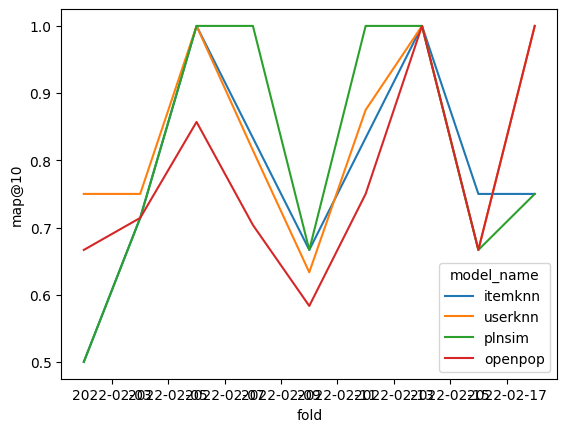

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2022-01-31,1,7d,2022-01-31,0.005686,0.011517,4,1,1.900000,0.500000,0.400000,0.24,0.12,...,1.0,1.0,1.0,1.000000,0.857143,0.857143,0.857143,0.857143,0.857143,0.123442
2022-02-02,6,10YE,2022-02-02,0.016565,0.006812,3,2,2.333333,0.333333,0.333333,0.20,0.10,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.129305
2022-02-04,15,7d,2022-02-04,0.008513,0.006521,2,1,1.400000,0.600000,0.333333,0.20,0.10,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.135060
2022-02-06,1,7d,2022-02-06,0.010373,0.005410,2,1,1.750000,1.000000,0.500000,0.30,0.15,...,1.0,1.0,1.0,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.131779
2022-02-08,7,7d,2022-02-08,0.009813,0.007542,3,1,2.000000,0.666667,0.500000,0.30,0.15,...,1.0,1.0,1.0,0.708333,1.000000,1.000000,1.000000,1.000000,1.000000,0.131054
2022-02-10,4,7d,2022-02-10,0.000959,0.004174,3,1,1.666667,0.333333,0.333333,0.20,0.10,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130381
2022-02-12,9,14d,2022-02-12,0.001014,0.004420,2,1,1.333333,0.666667,0.333333,0.20,0.10,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130597
2022-02-14,2,7d,2022-02-14,0.005631,0.004087,1,1,1.000000,1.000000,0.333333,0.20,0.10,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.129286
2022-02-16,3,60d,2022-02-16,0.005882,0.008943,2,1,1.833333,0.500000,0.333333,0.20,0.10,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.128205
